In [2]:
library(elasdics)
source("/home/mnl/Statistik/masterthesis/code/datasets.R")

In [3]:
set.seed(18)
data_curves <- curves.spiral(n_curves=4, rotate=FALSE, scale=FALSE, center=TRUE)
data_curves2 <- curves.digit3(rotate=FALSE, scale=FALSE, center=TRUE)

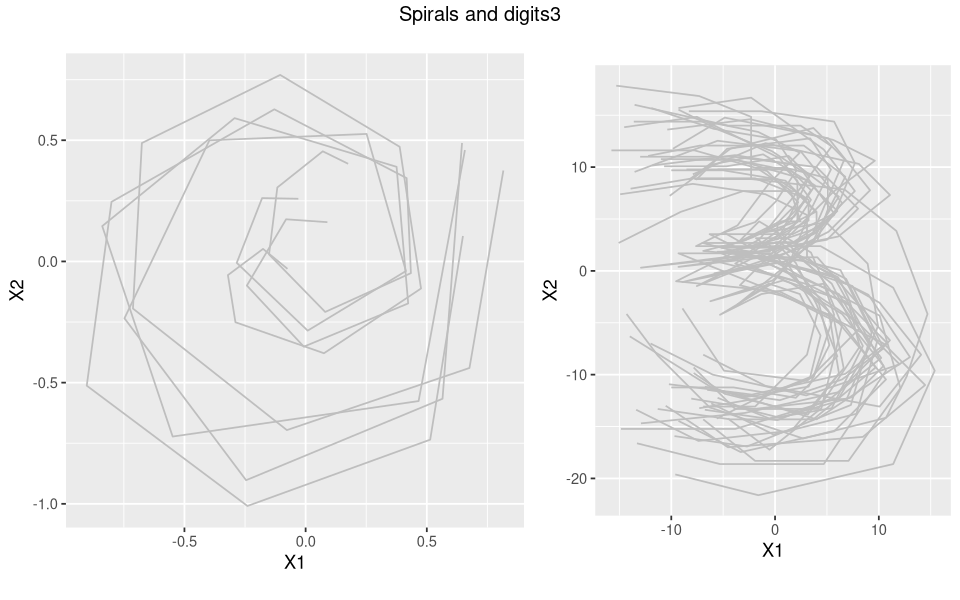

In [6]:
library(ggplot2)
library(gridExtra)
library(dplyr)

p1 <- ggplot(bind_rows(data_curves, .id="id"), aes(x=X1, y=X2)) + 
    geom_path(size=0.5, aes(group=id), color="grey") +
    coord_fixed()

p2 <- ggplot(bind_rows(data_curves2, .id="id"), aes(x=X1, y=X2)) + 
    geom_path(size=0.5, aes(group=id), color="grey") +
    coord_fixed()

# Display plots in smaller size
options(repr.plot.width=8, repr.plot.height=5)

grid.arrange(p1, p2, nrow=1, widths=5:4, top="Spirals and digits3")

In [7]:
# Compute Elastic Means
knots <- seq(0,1, length = 13)
smooth_elastic_mean <- compute_elastic_mean(data_curves, knots = knots)
polygon_elastic_mean <- compute_elastic_mean(data_curves, knots = knots, type = "polygon")
knots2 <- seq(0,1, length = 13)
smooth_elastic_mean2 <- compute_elastic_mean(data_curves2, knots = knots2)
polygon_elastic_mean2 <- compute_elastic_mean(data_curves2, knots = knots2, type = "polygon")

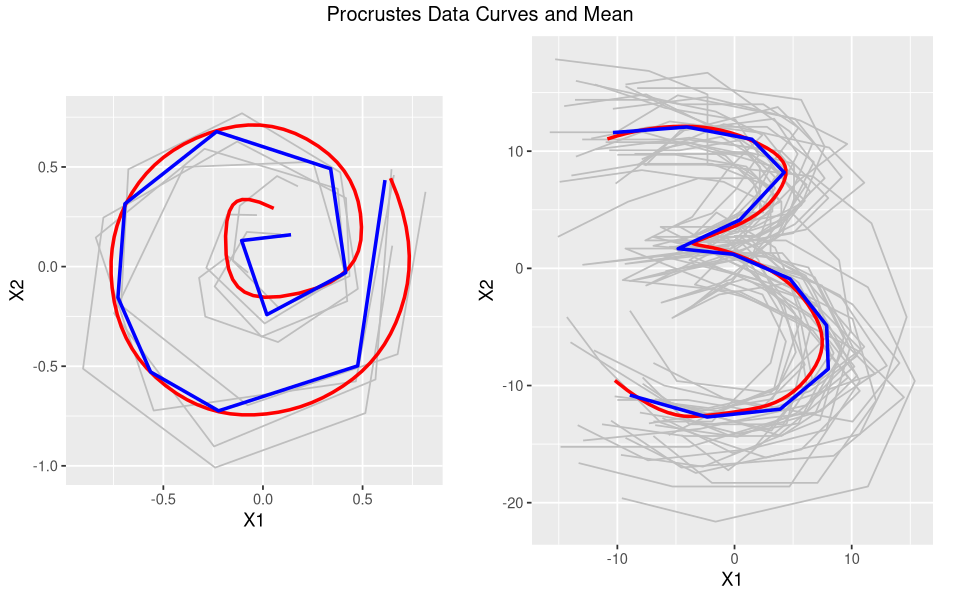

In [8]:
p1 <- ggplot(bind_rows(smooth_elastic_mean$data_curves, .id="id"), aes(x=X1, y=X2)) + 
    geom_path(aes(group=id), size = 0.5, color="grey") +
    geom_path(data=get_evals(smooth_elastic_mean), aes(x=X1, y=X2), color = "red", size = 1) +
    geom_path(data=get_evals(polygon_elastic_mean), aes(x=X1, y=X2), color = "blue", size = 1) +
    coord_fixed()

p2 <- ggplot(bind_rows(smooth_elastic_mean2$data_curves, .id="id"), aes(x=X1, y=X2)) + 
    geom_path(aes(group=id), size = 0.5, color="grey") +
    geom_path(data=get_evals(smooth_elastic_mean2), aes(x=X1, y=X2), color = "red", size = 1) +
    geom_path(data=get_evals(polygon_elastic_mean2), aes(x=X1, y=X2), color = "blue", size = 1) +
    coord_fixed()

grid.arrange(p1, p2, nrow=1, widths=8:9, top="Procrustes Data Curves and Mean")